In [3]:
import pandas as pd
import numpy as np

papers = pd.concat([
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/num_cited.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/doi.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/title.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/journal.pickle'),
  # pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/authids.pickle'),
  pd.read_pickle('/disks/qnap3/shared/scopus-22/data/paper_detail/year.pickle'),
], axis = "columns")
print(papers.head())

papers = papers[papers["doi"]!="NO DOI"]
journal_names = pd.read_pickle('/disks/qnap3/shared/scopus-22/data/id_names/journal_info.pickle')
journal_names.head()

,source,doi,title,journal,authids,year
107,12.0,10.1175/1520-0442(1997)010<2184:ASAIUF>2.0.CO;2,Assessing surface-atmosphere interactions usin...,13550,"[7004442182, 57203215073, 6603403884, 66024186...",1997
110,6.0,10.1063/1.1285965,Symmetry of quantum phase space in a degenerat...,27430,"[7006050637, 6602703231, 6603697521]",2000
116,32.0,10.1103/PhysRevE.56.623,Friction in strongly confined polymer melts: E...,21100855841,"[7005348905, 7402496690, 49961347000]",1997
117,77.0,10.1086/304826,Nearby young dwarf galaxies: Primordial gas an...,26765,"[7005148342, 7003508994]",1997
118,55.0,10.1002/(SICI)1521-4109(199907)11:9<623::AID-E...,Determination of iodate in salt samples with a...,23979,"[6603815313, 7004562485]",1999


In [4]:
journal_subset = [
  # Disciplinal
  # Politics
  # 15557 # APSR
  # 20333 #	Journal of Politics	gbr
  # 15555	# American Journal of Political Science	gbr
  # 25725	# World Politics	NO SOURCECOUNTRY
  # 13447	# Comparative Political Studies	usa

  # Physics 
  # 29143,85318,29465,29459, # Phisical Review A-D
  # 21100874237,21100874236,21100829284,21100779241, # Physical Review A-D
  # 29150, # Phisical Review Letters
  
  24222, #Scientometrics
  5100155103, #Journal of Informetrics
  22900, # Research Policy
  22894, # Research Evaluation
  21101062805, #Quantitative Science Studies
  # # General
  # 21100838541, # Nature Human Behaviour
  # 19700182758, # Nature Communications
  # 23571, # Science
  # 21121 # Proceedings of the National Academy of Science
] 

papers_subset = papers[papers["journal"].isin(journal_subset)].fillna(0)
papers_subset_valid = papers_subset[(papers_subset["source"]>0) & (papers_subset["doi"]!="NO DOI")]

In [24]:
groups = papers_subset_valid.groupby(["journal","year"])["source"].mean()

journal_year_normalized = groups.reset_index()
relative_citation = pd.merge(papers_subset_valid,\
                               journal_year_normalized,\
                               on=["journal","year"])
weights = relative_citation["source_x"].values/relative_citation["source_y"].values
relative_citation = relative_citation.assign(weights=weights)
relative_citation.head()

,source_x,doi,title,journal,authids,year,source_y,weights
0,95.0,10.1016/S0048-7333(99)00120-1,Overseas innovations by Japanese firms: An ana...,22900,[6701791787],2001,146.690476,0.647622
1,89.0,10.1016/S0048-7333(98)00063-8,The entry mode choice of MNEs: An evolutionary...,22900,"[6602109907, 55911619300, 55911619300, 5591161...",1998,124.084337,0.717254
2,42.0,10.1016/S0048-7333(98)00076-6,Technical change and incorporated R & D in the...,22900,"[57193200810, 8350362200]",1998,124.084337,0.338479
3,13.0,10.1016/0048-7333(95)00876-4,Features of policy-making processes in Japan's...,22900,"[55736360100, 36948060200]",1996,99.166667,0.131092
4,119.0,10.1007/BF02458472,A compendium of issues for citation analysis,24222,[57192994734],1999,23.550562,5.052958
...,...,...,...,...,...,...,...,...
11249,1.0,10.1162/qss_a_00148,The gender gap in highly prestigious internati...,21101062805,[6507332706],2021,2.416667,0.413793
11250,4.0,10.1093/reseval/rvaa037,No time for that now! Qualitative changes in m...,22894,"[57192424820, 57192424820]",2021,1.812500,2.206897
11251,1.0,10.1093/reseval/rvab006,Does government support of a few leading unive...,22894,"[57188984836, 57195239675, 25924090500, 571919...",2021,1.812500,0.551724
11252,23.0,10.1093/reseval/rvz003,From productive interactions to impact pathway...,22894,"[24773555400, 6505965654, 6505965654, 56100114...",2020,5.619048,4.093220


In [30]:
sample_papers = relative_citation.sample(n=3, weights=relative_citation["weights"])
for v in sample_papers.iterrows():
  print(v[1]["title"])
  print(f"   citation index: {v[1]['weights']:.3}")
  print(f"   published in {v[1]['year']}")
  print(f"   https://doi.org/"+ v[1]["doi"])

Perceived state of science in Nigerian universities
   citation index: 0.448
   published in 1988
   https://doi.org/10.1007/BF02019960
Growth of international collaboration in science: revisiting six specialties
   citation index: 3.82
   published in 2017
   https://doi.org/10.1007/s11192-016-2230-9
Testing the fairness of citation indicators for comparison across scientific domains: The case of fractional citation counts
   citation index: 2.14
   published in 2012
   https://doi.org/10.1016/j.joi.2011.09.002


# Author & JournalDetail

In [5]:
papers[papers["doi"]=="NO DOI"]

,source,doi,title,journal,authids,year
308,181.0,NO DOI,On the energy equation and efficiency paramete...,26750,[55959399700],2000
405,43.0,NO DOI,The COMPTEL 1.809 MeV all-sky image,80347,"[6701605928, 7202750605, 57218963382, 70048738...",1996
519,124.0,NO DOI,Towards a fundamental calibration of stellar p...,26750,[57196772599],1998
555,48.0,NO DOI,"The sombrero galaxy: II. Colours, kinematics a...",26750,"[6603683455, 6603683455, 7005670560, 700392673...",1996
670,47.0,NO DOI,Auxin changes both the extensibility and the y...,19019,"[23098091700, 7005936582, 7403533196]",1991
...,...,...,...,...,...,...
26093066,NaN,NO DOI,Statistic in ENT and head and neck surgery,86103,"[7006839681, 7005482829, 6507554823, 650693522...",1991
26106271,NaN,NO DOI,Analysis of panel data for transportation plan...,36719,"[6602771485, 55197122100]",1991
26106272,NaN,NO DOI,Right colectomies,4800154025,[55415075100],1991
26093071,NaN,NO DOI,Ultrastructural study of in vitro cultured emb...,36657,"[35496629100, 6505625582, 6506064223, 74024475...",1991


In [6]:
papers.replace(to_replace={"NO DOI":None}).dropna()

,source,doi,title,journal,authids,year
107,12.0,10.1175/1520-0442(1997)010<2184:ASAIUF>2.0.CO;2,Assessing surface-atmosphere interactions usin...,13550,"[7004442182, 57203215073, 6603403884, 66024186...",1997
110,6.0,10.1063/1.1285965,Symmetry of quantum phase space in a degenerat...,27430,"[7006050637, 6602703231, 6603697521]",2000
116,32.0,10.1103/PhysRevE.56.623,Friction in strongly confined polymer melts: E...,21100855841,"[7005348905, 7402496690, 49961347000]",1997
117,77.0,10.1086/304826,Nearby young dwarf galaxies: Primordial gas an...,26765,"[7005148342, 7003508994]",1997
118,55.0,10.1002/(SICI)1521-4109(199907)11:9<623::AID-E...,Determination of iodate in salt samples with a...,23979,"[6603815313, 7004562485]",1999
...,...,...,...,...,...,...
85131836473,11.0,10.1061/(ASCE)MT.1943-5533.0001958,Stiffness-Based Quality Control Evaluation of ...,16299,"[57217697232, 57219425064, 57222129996]",2017
85131837670,29.0,10.1186/s40959-015-0008-5,Tyrosine kinase inhibitor associated vascular ...,21101059717,"[35799959500, 42661708700, 7003621654, 6603020...",2015
85131839884,1.0,10.1186/s43163-021-00077-x,Allergic rhinitis patients associated with mig...,21101072530,"[57203020066, 6603007657, 6504524628, 57738180...",2021
85131840160,1.0,10.4103/1012-5574.181084,Auditory short-term memory in children with co...,21101072530,"[57737312500, 57737598600, 57737312600, 577375...",2016


In [2]:
journal_names = pd.read_pickle('/disks/qnap3/shared/scopus-22/data/id_names/journal_info.pickle')
journal_names.head()

,name,country
journalid,,
0,NO SOURCENAME,NO SOURCECOUNTRY
12000,Journal of Technology in Counseling,usa
12001,Journal of the Experimental Analysis of Behavior,NO SOURCECOUNTRY
12002,Journal of the History of the Behavioral Sciences,NO SOURCECOUNTRY
12003,Reconstructionist,usa


In [42]:
titles = ["World Politics","Comparative Political Studies","Comparative Politics"]
selected_journal_ids = {}
for title in titles:
  selected_journal = journal_names[journal_names["name"].str.contains(title).fillna(False)].head(1)
  selected_journal_ids.update({title:selected_journal.index[0]})
selected_journal_ids

{'World Politics': 25725,
 'Comparative Political Studies': 13447,
 'Comparative Politics': 13448}

1088


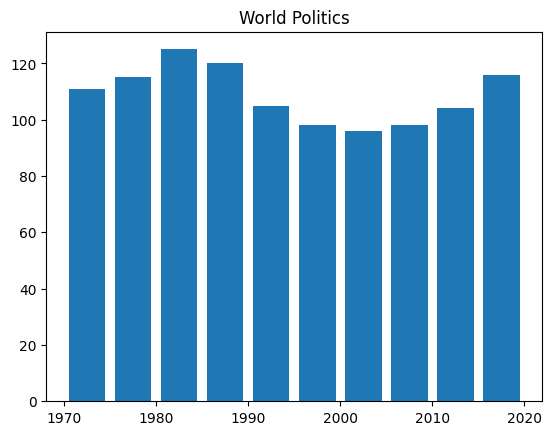

1833


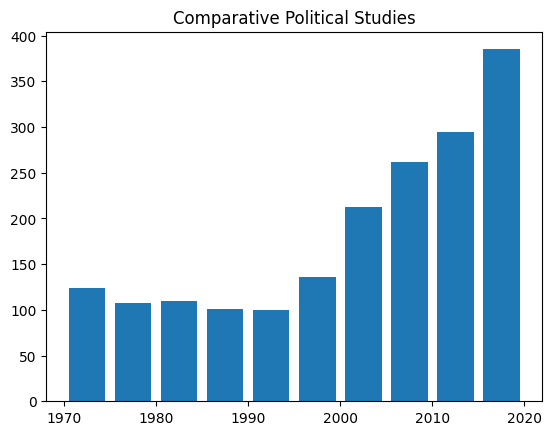

583


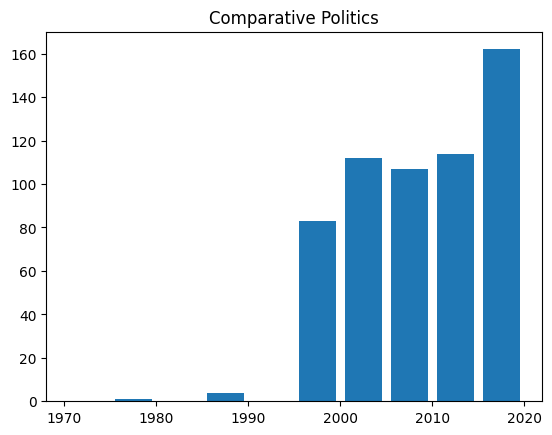

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
for k in selected_journal_ids.keys():
  papers_subset = papers[papers["journal"]==selected_journal_ids[k]].fillna(0)
  hist, bins = np.histogram(papers_subset["year"], [i for i in range(1970,2025,5)])
  plt.bar((bins[1:]+bins[:-1])/2,hist,width=4)
  print(hist.sum())
  plt.title(k)
  plt.show()
  plt.clf()
  papers_subset.to_pickle(f"./{k}_papers.pickle")

In [53]:
author_names = pd.read_pickle('/disks/qnap3/shared/scopus-22/data/id_names/author_df.pickle')
author_names = author_names.drop_duplicates(subset="authid").drop(["eid"], axis="columns")
author_names.head()

,authid,authseq,indexname,surname,givenname
0,6506594745,1,Dereli O.,Dereli,Ömer
1,55860963200,4,Karakas Sarikaya E.,Karakaş Sarikaya,Ebru
2,16175094900,2,Erdogdu Y.,Erdoğdu,Yusuf
3,57193622072,3,Ates L.,Ateş,Levent
4,57193630639,5,Ozturan F.P.,Özturan,F. Pınar


In [65]:
sur = "Akasaki"
given = "Isamu"

sample = author_names[author_names["surname"].str.contains(sur).fillna(False)]
print(sample.shape[0], sample["givenname"].unique())
sample = sample[sample["givenname"].str.contains(given).fillna(False)]
sample

90 ['Yukio' 'Isamu' 'NO GIVENNAME' 'Yuichi' 'Yasuharu' 'Yoshihiko' 'Takashi'
 'Satoshi' 'Tetsuya' 'Yuka' 'Yasutoshi' 'Shoko' 'Mitsuru' 'Yasuaki'
 'Kyota' 'Takeshi' 'Shogo' 'Kenji' 'Tomomi' 'Tsubasa' 'Takuya' 'Shota'
 'Katsuyuki' 'Shuichi' 'Moriaki' 'Kelly A.' 'Hitomi' 'Taigo' 'Koji' 'Eri'
 'Tetsuro' 'Yasutsugu' 'Asako' 'Hina' 'Atsuko' 'Keisuke' 'Bruno A. N.'
 'Tomoyasu' 'Takayuki' 'Takeo' 'Yosuke' 'Katsuhiko' 'Yusuke' 'Ichimoto'
 'Naoya' 'Yutaka' 'Mifuyu' 'Yasutaka' 'Masahiko' 'Hisaki' 'Yasumitsu'
 'Hajime' 'Shigehumi' 'Yukiko' 'Syogo' 'Ryota' 'Kyouta' 'Kanji']


,authid,authseq,indexname,surname,givenname
1473637,55169779200,2,Akasaki I.,Akasaki,Isamu
266404700,57226261456,5,Akasaki I.,Akasaki,Isamu


# by Journal

In [2]:
journal_subset = [
  # Disciplinal
  # 15557 # APSR
  # 20333 #	Journal of Politics	gbr
  # 15555	# American Journal of Political Science	gbr
  # 25725	# World Politics	NO SOURCECOUNTRY
  # 13447	# Comparative Political Studies	usa
  
  # 29143,85318,29465,29459, # Physics
  # 21100874237,21100874236,21100829284,21100779241, # Physics
  # 29150, # PRL
  24222, #Scientometrics
  5100155103, #Journal of Informetrics
  22900, # Research Policy
  22894, # Research Evaluation
  21101062805, #Quantitative Science Studies
  # General
  # 21100838541, # Nature Human Behaviour
  # 19700182758, # Nature Communications
  # 23571, # Science
  # 21121 # Proceedings of the National Academy of Science
] 

papers_subset = papers[papers["journal"].isin(journal_subset)].fillna(0)
papers_subset_valid = papers_subset[(papers_subset["source"]>0) & (papers_subset["doi"]!="NO DOI")]

NameError: name 'papers' is not defined

<BarContainer object of 10 artists>

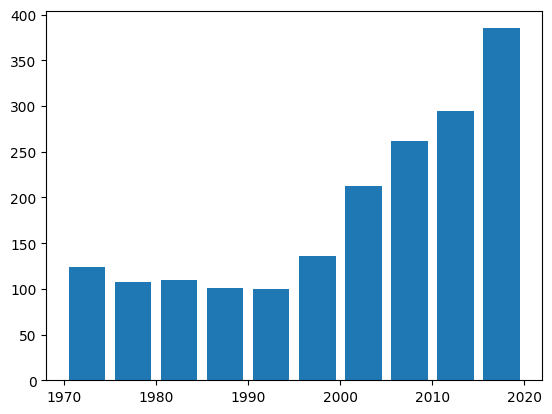

In [34]:
import matplotlib.pyplot as plt
hist, bins = np.histogram(papers_subset["year"], [i for i in range(1970,2025,5)])
plt.bar((bins[1:]+bins[:-1])/2,hist,width=4)

In [1]:
sample_papers = papers_subset_valid.sample(n=3, weights=papers_subset_valid["source"])
for v in sample_papers.iterrows():
  print(v[1]["title"])
  print(f"cited {v[1]['source']} times" , "https://doi.org/"+ v[1]["doi"])

NameError: name 'papers_subset_valid' is not defined

In [53]:
author_subset = 56811356000 # "Misha Teplitskiy" 
# 56033994900, # Dashun Wang
# , # James Evans
# 56811356000, # "Misha Teplitskiy" 
# 6603149512, # "Brian Uzzi"
# "Santo Fortunato"
# "Roberto Sinatra"
# 14065735100, # "Pierre Azoulay"
# "Chaoming Song"
# 8454031800, # "Yong-Yeol Ahn"
# "Yian Yin"
# "Chaoqun Ni"
# 57205926991, # "Matt Marx"

# 14632830700, # "Ludo Waltman" 
# 8850037200, # "Lutz Bornmann"
# "Vincent Lariviere"
# 7004532295, # "Nees Jan van Eck"
# 9844625800, # "Rodrigo Costas"
# 57703938200, # "Cassidy R. Sugimoto"
# "Ismael Rafols"
# 7003954276, # "Loet Leydesdorff"
# 57527841900, # "Mike Thelwall"
# 25928446800, # "Raf Guns"
# 7006399008, # "A.F.J. van Raan",

papers_subset_author = papers_authors[papers_authors["authids"]==author_subset]
papers_subset_author_valid = papers_subset_author[(papers_subset_author["source"]>0) & (papers_subset_author["doi"]!="NO DOI")]

In [56]:
papers_subset_author

,source,doi,title,journal,authids,year
84940482008,7.0,10.1007/s12108-015-9288-3,Frame Search and Re-search: How Quantitative S...,16931,56811356000,2016
84991383843,37.0,10.1002/asi.23687,Amplifying the impact of open access: Wikipedi...,21100307484,56811356000,2017
85044164436,7.0,10.15195/v3.a45,"Consensus, polarization, and alignment in the ...",21100855741,56811356000,2016
85050406022,22.0,10.1016/j.respol.2018.06.014,The sociology of scientific validity: How prof...,22900,56811356000,2018
85050406022,22.0,10.1016/j.respol.2018.06.014,The sociology of scientific validity: How prof...,22900,56811356000,2018
85062640200,40.0,10.1038/s41562-019-0541-6,The wisdom of polarized crowds,21100838541,56811356000,2019
85062640200,40.0,10.1038/s41562-019-0541-6,The wisdom of polarized crowds,21100838541,56811356000,2019
85073875871,1.0,NO DOI,What does citations measure: Evidence from citers,21100933691,56811356000,2019
84964621510,NaN,NO DOI,The transmission of scientific knowledge to Wi...,3300147405,56811356000,2015


In [44]:
sample_papers = papers_subset_author_valid.sample(n=3, weights=papers_subset_author_valid["source"])
for v in sample_papers.iterrows():
  print(v[1]["title"])
  print(f"cited {v[1]['source']} times" , "https://doi.org/"+ v[1]["doi"])

ValueError: Invalid weights: weights sum to zero

In [52]:
author_names

NameError: name 'author_names' is not defined